In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = None

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chaptername"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading Data

In [3]:
calendar = pd.read_csv('./Data/calendar.csv', parse_dates=['date'])
listings = pd.read_csv('./Data/listings.csv', parse_dates=['last_scraped', 'host_since', 'calendar_last_scraped','first_review', 'last_review'])
reviews = pd.read_csv('./Data/reviews.csv', parse_dates=['date'])

## General Data overview

In [4]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
# calculating the unique number of listings
calendar.listing_id.nunique()

3585

In [6]:
calendar.describe(include='all')

,listing_id,date,available,price
count,1.308890e+06,1308890,1308890,643037
unique,NaN,365,2,1246
top,NaN,2016-12-27 00:00:00,f,$150.00
freq,NaN,3586,665853,20752
first,NaN,2016-09-06 00:00:00,NaN,NaN
last,NaN,2017-09-05 00:00:00,NaN,NaN
mean,8.442118e+06,NaN,NaN,NaN
std,4.500149e+06,NaN,NaN,NaN
min,3.353000e+03,NaN,NaN,NaN
25%,4.679319e+06,NaN,NaN,NaN


In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [8]:
# checking that the data is unique at an id level
listings.id.duplicated().any()

False

In [9]:
listings.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3585,3.585000e+03,3585,3585,3442,2528,3585,3585,2170,1610,2295,2096,2031,2393,2986,2986,3585,2986,3.585000e+03,3585,3585,3585,3574,2276,3114,3114,3114,3585,3585,3585,3246,3585.000000,3585.000000,3585,3585,3585,3585,3042,3585,0.0,3583,3585,3547,3571,3585,3585,3585,3585.000000,3585.000000,3585,3582,3585,3585.000000,3571.000000,3575.000000,3576.000000,3585,3585,56.000000,3585,892,888,1342,2478,3585.000000,3585,3585.000000,3.585000e+03,3585,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585,3585.000000,2829,2829,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585,0.0,0.0,3585,3585,3585,3585,3585.000000,2829.000000
unique,NaN,3585,NaN,1,3504,3113,2268,3423,1,1728,1269,1859,1762,1617,1928,2986,2986,3585,2986,NaN,2181,1334,1281,176,1240,4,52,72,2,2174,2174,53,NaN,NaN,83,2,2,1239,30,25,NaN,38,1,43,4,39,1,1,NaN,NaN,2,13,3,NaN,NaN,NaN,NaN,5,3092,NaN,324,243,288,54,79,NaN,51,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,1,NaN,975,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,4,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/5026613,NaN,2016-09-07 00:00:00,Lux 2BR by Fenway w/WiFi,"The unit is stylishly designed for comfort, va...",The studio's kitchenette comes equipped with a...,Private room in a HOSTEL exclusive for Airbnb ...,none,Conveniently bordering the neighborhoods of th...,Although we do not allow pets in our apartment...,"These newly constructed, luxury apartments epi...","You have access to the entire apartment, and a...",Need more towels? A restaurant recommendation?...,House Rules 1. Check-in is 4 pm local time. If...,https://a2.muscache.com/im/pictures/81545560/7...,https://a2.muscache.com/im/pictures/47e200af-d...,https://a2.muscache.com/im/pictures/49b16d10-2...,https://a2.muscache.com/im/pictures/8ee1b1c1-6...,NaN,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30 00:00:00,"Boston, Massachusetts, United States",ABOUT US:\r\n\r\nSeamlessTransition is a full-...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Allston-Brighton,NaN,NaN,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Allston-Brighton,Jamaica Plain,NaN,Boston,MA,02116,Boston,"Boston, MA",US,United States,NaN,NaN,t,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,$150.00,"$1,000.00","$3,500.00",$100.00,$100.00,NaN,$0.00,NaN,NaN,today,NaN,NaN,NaN,NaN,NaN,2016-09-06 00:00:00,NaN,2016-04-05 00:00:00,2016-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,NaN,NaN
freq,NaN,

In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [11]:
reviews.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,6.827500e+04,6.827500e+04,68275,6.827500e+04,68275,68222
unique,NaN,NaN,2045,NaN,14775,67311
top,NaN,NaN,2016-04-19 00:00:00,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,342,NaN,654,112
first,NaN,NaN,2009-03-21 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2016-09-06 00:00:00,NaN,NaN,NaN
mean,4.759910e+06,5.246516e+07,NaN,2.802389e+07,NaN,NaN
std,3.788990e+06,2.790991e+07,NaN,2.234097e+07,NaN,NaN
min,3.353000e+03,1.021000e+03,NaN,1.430000e+02,NaN,NaN
25%,1.458081e+06,3.010420e+07,NaN,9.001346e+06,NaN,NaN


## When is it cheapest to visit Boston?

In [12]:
# Only the available listing have a price so we will have to filter to just them
calendar_available = calendar[calendar.available == 't'].copy()

In [13]:
# The price column needs to be change to a float, requiring string replacement and type changing
calendar_available['price'] = calendar_available.price.str.replace('\$|,','').astype(float)

In [14]:
# Grouping by week of year as there is a complete years worth of data
calendar_available = pd.DataFrame(calendar_available.groupby([calendar_available.date.dt.weekofyear]).mean()['price'])

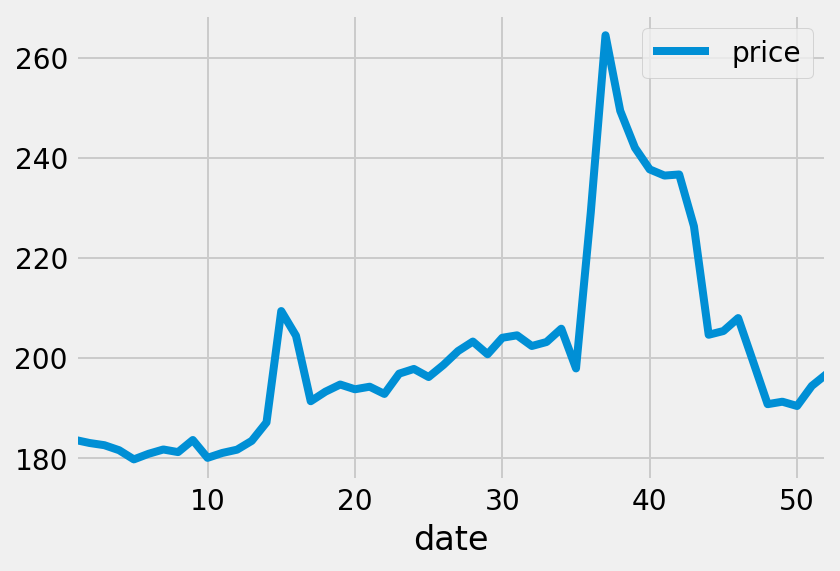

In [15]:
calendar_available.plot();

We can easily see that the cheapest time to stay in Boston is during the first 12 weeks of the year. Interestingly there is a large jump in price at about week 35 that lasts till week 44.

## Does the time as a host make them less accepting?

In [16]:
# Creating a column of days as host. We will use the last booking date from the calander as the present date
listings['daysAsHost'] = (calendar.date.max() - listings.host_since)

In [17]:
# Pulling days from the series object
listings['daysAsHost'] = listings.daysAsHost.dt.days

In [18]:
# Transforming the acceptance rate.
listings['host_acceptance_rate'] = listings.host_acceptance_rate.str.replace('%', '')

In [19]:
# Filtering the data so we only have that with known acceptance date.
listings_days_acceptance = listings[listings.host_response_rate.notna()][['daysAsHost','host_acceptance_rate']]

In [20]:
listings_days_acceptance['host_acceptance_rate'] = listings_days_acceptance.host_acceptance_rate.astype(int)

In [21]:
listings_days_acceptance.corr()

,daysAsHost,host_acceptance_rate
daysAsHost,1.000000,-0.172121
host_acceptance_rate,-0.172121,1.000000


We can see a negative corrolation between the days as a host and acceptance rate.

## What features lead to a higher price?

In [22]:
listings.price.sample(5, random_state=42)

3163    $160.00
3133    $135.00
937     $525.00
196     $114.00
2852     $55.00
Name: price, dtype: object

In [23]:
# removing string characters
listings['price'] = listings.price.str.replace('\$|,', '')
# changing type to float
listings['price'] = listings.price.astype(float)

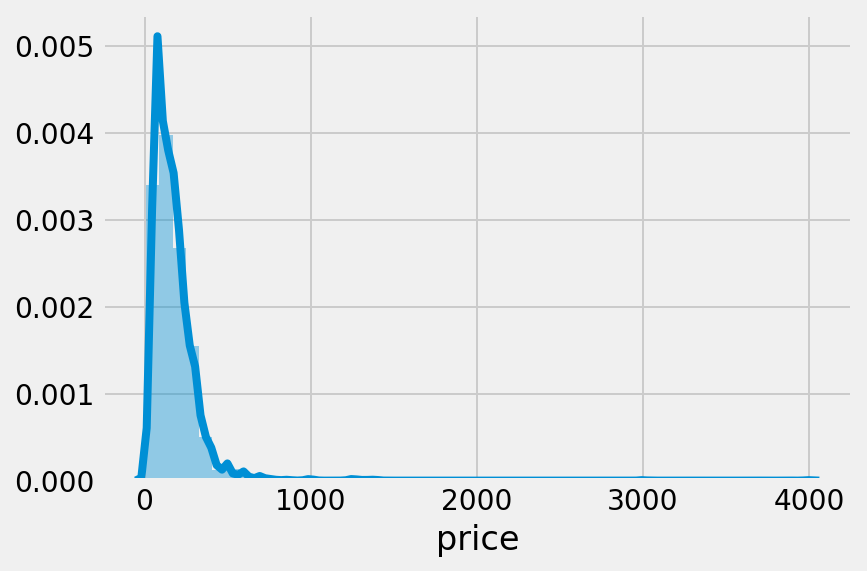

In [24]:
sns.distplot(listings.price);

In [25]:
# selecting out wanted columns
listings_selected = listings[['description',
          'host_response_time',
          'neighbourhood_cleansed',
          'property_type',
          'room_type',
          'accommodates',
          'bathrooms',
          'bedrooms',
          'beds',
          'bed_type',
          'price',
          'cleaning_fee',
          'minimum_nights',
          'maximum_nights']].copy()

In [26]:
#  Using description length as a feature
listings_selected['description_length'] = listings_selected.description.str.len()
listings_selected.drop(['description'], axis=1, inplace=True)

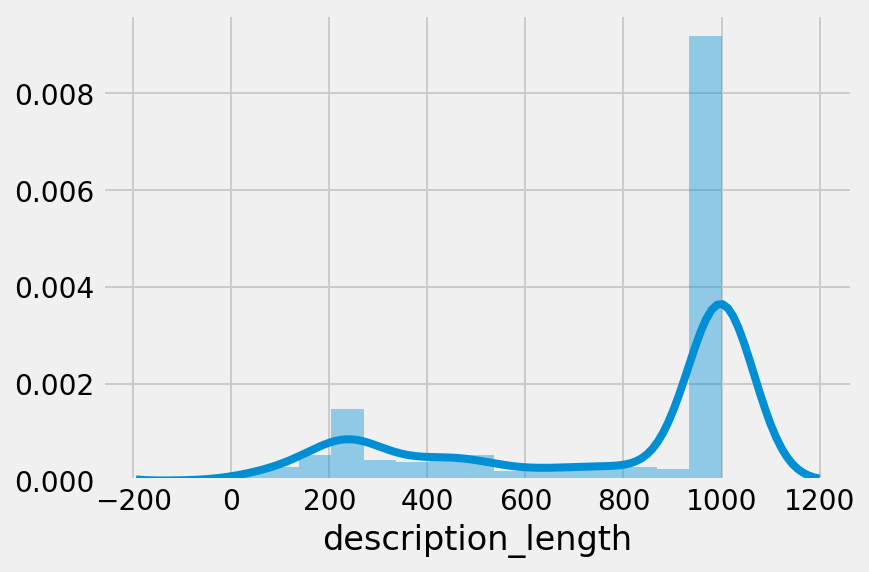

In [27]:
sns.distplot(listings_selected.description_length);

In [28]:
listings.description[1]

"Charming and quiet room in a second floor 1910 condo building. The room has a full size bed, darkening curtains, window A/C unit. It's quiet because it's in the back of the house. Shared bathroom. Guests can use kitchen, living room. Pet friendly. Small but cozy and quite room with a full size bed. Ample street parking. Apt has one more bedroom (which I use) and large living space and kitchen that you can use.  Possibility to do laundry. Two porches. If I am at home, I am likely working in my home office, which is a separate room. I can help you settle in and give you tips and directions on the neighborhood and Boston.  The room is in Roslindale, a diverse and primarily residential neighborhood of Boston. It's well connected via public transportation to other neighborhoods and easy to access by car. Roslindale Square is a nice business district with supermarkets. banks, a bakery, etc. (See my Guidebook for some recommendations). The Arnold Arboretum is just steps away. Plenty of safe 

It looks as if the data is truncated. So I have decided to drop this column.

In [29]:
listings_selected.drop(['description_length'], axis=1, inplace=True)

### host_response_time

In [30]:
listings.host_response_time.value_counts(dropna=False)

within an hour        1384
within a few hours    1218
NaN                    471
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

There seem to be 220 rows of data where we don't know the host_response_time. I am not going to remove this data for now as it may prove of use.

In [31]:
# adding the data to a list for categorical columns
cat_columns = ['host_response_time']

### neighbourhood_cleansed

In [32]:
listings_selected.neighbourhood_cleansed.value_counts(dropna=False)

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

There seems to be no missing elements of data but there is a unbalance in the areas.

In [33]:
cat_columns.append('neighbourhood_cleansed')

### property_type

In [34]:
listings_selected.property_type.value_counts(dropna=False)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
NaN                   3
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [35]:
# property_type has 2 elements that are missing. As this makes up such a small amount of the data I will drop these rows
listings_selected.dropna(subset=['property_type'], inplace=True)

In [36]:
cat_columns.append('property_type')

### room_type

In [37]:
listings_selected.room_type.value_counts(dropna=False)

Entire home/apt    2125
Private room       1377
Shared room          80
Name: room_type, dtype: int64

In [38]:
cat_columns.append('room_type')

### accommodates

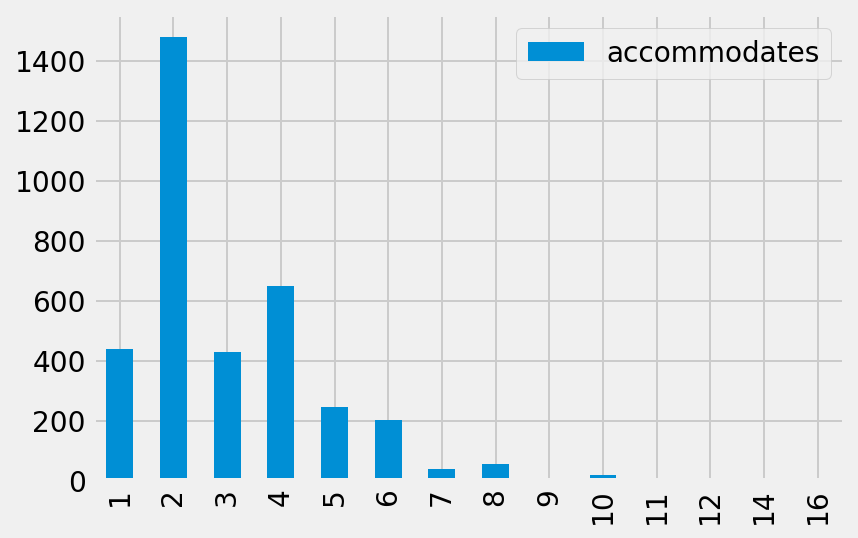

In [39]:
pd.DataFrame(listings_selected.accommodates.value_counts(dropna=False).sort_index()).plot(kind='bar');

### bathrooms

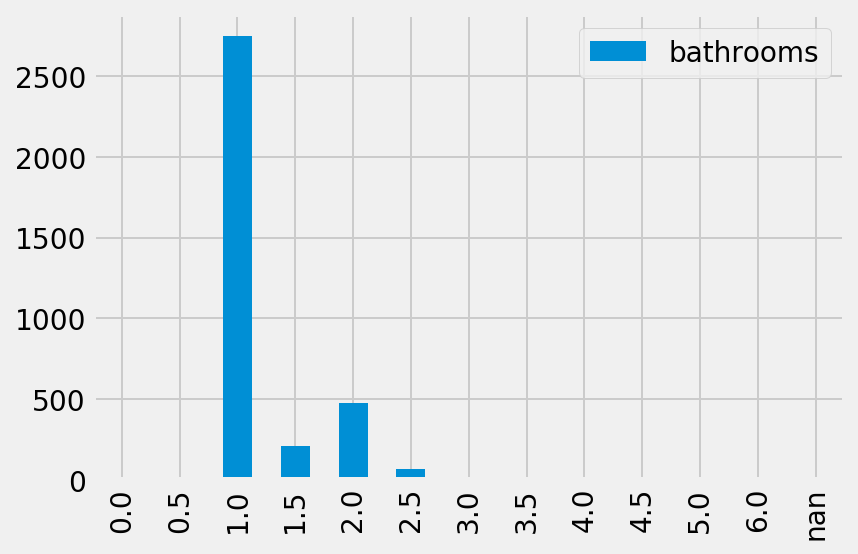

In [40]:
pd.DataFrame(listings_selected.bathrooms.value_counts(dropna=False).sort_index()).plot(kind='bar');

I find this data odd as there are number of 1.5 bathrooms. This could mean that there is only a sink and toilet but no shower.

In [41]:
# dropping rows where there is no bathroom number as there are so little of them in the data
listings_selected.dropna(subset=['bathrooms'], inplace=True)

### bedrooms

In [42]:
listings_selected.bedrooms.value_counts(dropna=False)

 1.0    2364
 2.0     692
 0.0     286
 3.0     155
 4.0      45
 5.0      16
NaN       10
Name: bedrooms, dtype: int64

There seem to be some rows with missing bedrooms. I will take a close look at these

In [43]:
listings_selected[listings_selected.bedrooms.isna()]

,host_response_time,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,minimum_nights,maximum_nights
918,within a day,South End,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,176.0,NaN,1,1125
920,within a few hours,South End,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,229.0,$75.00,2,120
924,within a few hours,South End,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,275.0,NaN,3,730
1095,within a few hours,South End,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,186.0,NaN,3,365
1117,within a few hours,South End,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,269.0,NaN,3,365
1132,within a few hours,South End,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,225.0,NaN,3,365
1251,within a few hours,Back Bay,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,209.0,NaN,2,365
1366,within a few hours,Back Bay,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,209.0,NaN,2,120
1419,within a few hours,Back Bay,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,209.0,NaN,2,120
1959,within an hour,Beacon Hill,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,175.0,$50.00,4,365


These all seem to have be Apartments where the person has the entire home and there is one bed. I am going to assume that there is either not a bedroom for the bed or the user has not entered the data correctly. For these I am just going to fill the missing values with 1 as it is the median of the data.

In [44]:
listings_selected['bedrooms'] = listings_selected.bedrooms.fillna(1)

### beds

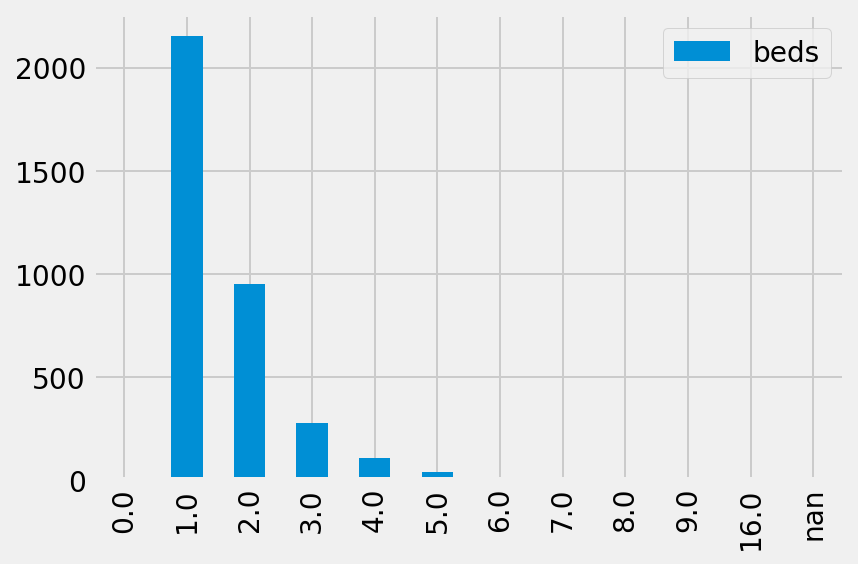

In [45]:
pd.DataFrame(listings_selected.beds.value_counts(dropna=False).sort_index()).plot(kind='bar');

In [46]:
# drop rows of missing bed data as there are so few of them
listings_selected.dropna(subset=['beds'], inplace=True)

### bed_type

In [47]:
listings_selected.bed_type.value_counts(dropna=False)

Real Bed         3432
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [48]:
cat_columns.append('bed_type')

### cleaning_fee

In [49]:
listings_selected.cleaning_fee.value_counts(dropna=False).head()

NaN        1099
$100.00     351
$50.00      325
$25.00      210
$20.00      135
Name: cleaning_fee, dtype: int64

I am assuming that if there if the cleaning fee is nan then it is not applicable and will fill with 0

In [50]:
# changing data so that it can be used as as float
listings_selected['cleaning_fee'] = listings_selected.cleaning_fee.str.replace('\$|,', '')

In [51]:
listings_selected['cleaning_fee'] = listings_selected.cleaning_fee.fillna(0)

In [52]:
listings_selected['cleaning_fee'] = listings_selected.cleaning_fee.astype(float)

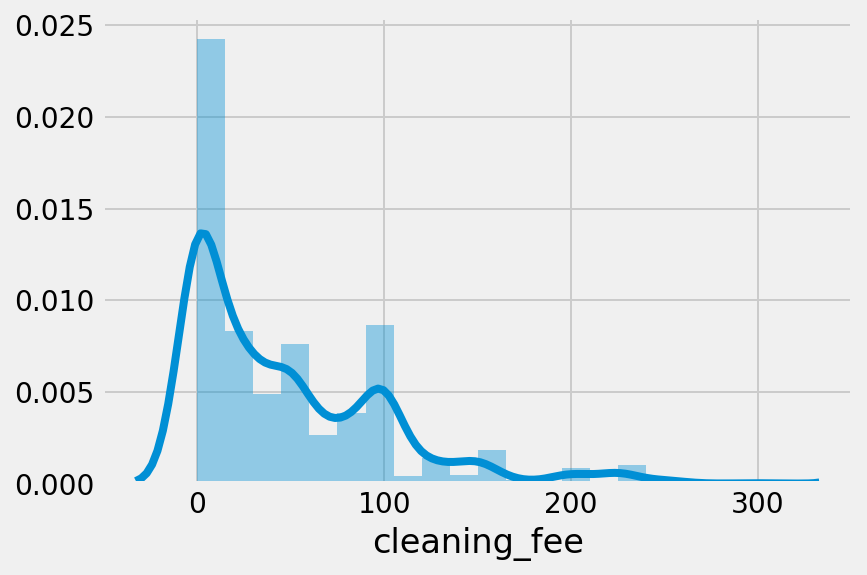

In [53]:
sns.distplot(listings_selected.cleaning_fee, bins=20);

### minimum_nights

In [54]:
# checking for missing data
listings_selected.minimum_nights.isna().any()

False

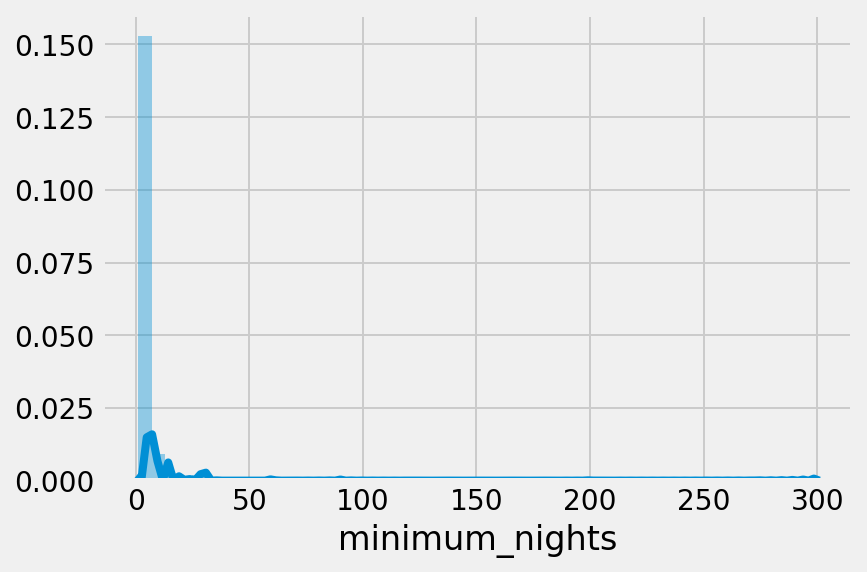

In [55]:
sns.distplot(listings_selected.minimum_nights);

This shows that there are some extreme outliers in the data. These might need to be removed as they may badly affect our model.

In [56]:
listings_selected[listings_selected.minimum_nights > 50]

,host_response_time,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,minimum_nights,maximum_nights
59,NaN,Jamaica Plain,Bed & Breakfast,Private room,2,1.0,1.0,1.0,Real Bed,55.0,0.0,300,365
1243,within a day,Back Bay,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,110.0,150.0,60,365
1344,within a day,Back Bay,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,99.0,150.0,90,365
1416,within a day,Back Bay,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,130.0,150.0,60,365
1526,within a day,Back Bay,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,130.0,150.0,60,365
1764,within a few hours,Charlestown,Apartment,Entire home/apt,3,2.0,2.0,2.0,Real Bed,1000.0,100.0,200,1125
2195,a few days or more,Fenway,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,45.0,35.0,90,1125
2635,NaN,Brighton,Apartment,Entire home/apt,5,2.0,3.0,4.0,Real Bed,135.0,180.0,60,180
3475,within an hour,Allston,House,Private room,1,1.5,1.0,1.0,Real Bed,58.0,50.0,273,364


### maximum_nights

In [57]:
# checking for missing data
listings_selected.maximum_nights.isna().any()

False

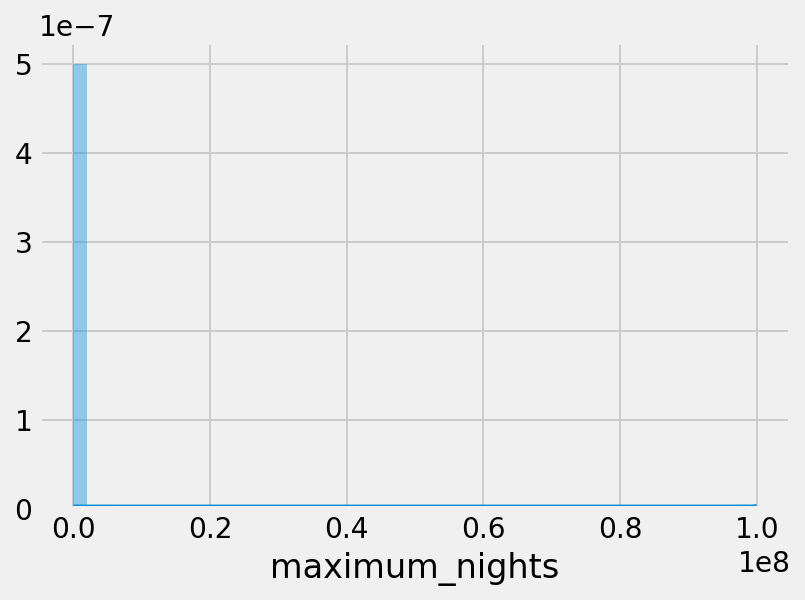

In [58]:
sns.distplot(listings_selected.maximum_nights);

There are again some outliers in the data that probably should be removed

In [59]:
listings_selected[listings_selected.maximum_nights > 1825]

,host_response_time,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,minimum_nights,maximum_nights
697,within an hour,North End,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,125.0,45.0,1,99999999
902,within a day,Roxbury,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,35.0,50.0,30,2000
1649,within an hour,East Boston,House,Private room,1,1.0,1.0,1.0,Real Bed,80.0,100.0,7,9999


In [60]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [61]:
cat_columns

['host_response_time',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type']

In [62]:
listings_dummied = create_dummy_df(listings_selected, cat_cols=cat_columns, dummy_na=False)

In [63]:
# create our features and labels data
X = listings_dummied.drop(['price'],axis=1)
y = listings_dummied['price']

In [64]:
# spliting our data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
model = LinearRegression(normalize=True, n_jobs=-1)

In [66]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [67]:
train_pred = model.predict(X_train)

In [68]:
np.sqrt(mean_squared_error(y_train, train_pred))

90.30181911857925

In [69]:
r2_score(y_train, train_pred)

0.4750089894997678

The r2 score shows that 51% of the variance can be explained by our model.

In [70]:
test_pred = model.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(y_test, test_pred))

179.87710804023854

In [72]:
r2_score(y_test, test_pred)

0.22350468665906553

In [73]:
# extracting the coefficients into a DataFrame and transposing them
coefs = pd.DataFrame(model.coef_).T

# creating a list of the features used and using them for the coefficients
coefs.columns = list(X_train)

# Transposing the DataFrame so that it is easier to fit on screen
coefs = coefs.T

# alter column name so that it is more clear
coefs.columns = ['coefs']

# sorting the values to be in ascending order
coefs.sort_values(['coefs'], inplace=True)

# resetting the index so that we can slice the data
coefs.reset_index(inplace=True)

# altering the columns names again
coefs.columns = ['feature','coefs']

In [74]:
coefs[coefs.feature.str.startswith('neighbourhood_cleansed')].style.background_gradient(cmap=cm)

,feature,coefs
7,neighbourhood_cleansed_Hyde Park,-23.2145
8,neighbourhood_cleansed_Roslindale,-22.8494
9,neighbourhood_cleansed_West Roxbury,-22.365
10,neighbourhood_cleansed_Mattapan,-20.7355
12,neighbourhood_cleansed_Dorchester,-18.6043
16,neighbourhood_cleansed_East Boston,-0.869497
22,neighbourhood_cleansed_Brighton,3.66917
24,neighbourhood_cleansed_Jamaica Plain,5.10969
30,neighbourhood_cleansed_Mission Hill,20.2388
32,neighbourhood_cleansed_West End,24.6523


In [75]:
coefs[coefs.feature.str.startswith('property_type')].style.background_gradient(cmap=cm)

,feature,coefs
0,property_type_Camper/RV,-134.522
3,property_type_Dorm,-38.34
5,property_type_Entire Floor,-28.773
18,property_type_Loft,-0.0567078
23,property_type_House,4.48671
26,property_type_Guesthouse,7.69277
28,property_type_Condominium,12.9395
29,property_type_Townhouse,19.867
33,property_type_Villa,25.1347
36,property_type_Bed & Breakfast,32.7516


In [76]:
coefs[coefs.feature.str.startswith('host_response_time')].style.background_gradient(cmap=cm)

,feature,coefs
4,host_response_time_within a day,-30.4121
6,host_response_time_within an hour,-25.579
13,host_response_time_within a few hours,-16.5984


In [77]:
coefs[coefs.feature.str.startswith('room_type')].style.background_gradient(cmap=cm)

,feature,coefs
1,room_type_Shared room,-60.4071
2,room_type_Private room,-52.9725


In [78]:
coefs[coefs.feature.str.startswith('bed_type')].style.background_gradient(cmap=cm)

,feature,coefs
11,bed_type_Couch,-19.7362
14,bed_type_Pull-out Sofa,-10.1056
15,bed_type_Futon,-9.48902
25,bed_type_Real Bed,6.90685


In [79]:
coefs[coefs.feature.isin(['accommodates','bathrooms','bedrooms','beds','cleaning_fee','minimum_nights','maximum_nights'])].style.background_gradient(cmap=cm)

,feature,coefs
17,minimum_nights,-0.568308
19,maximum_nights,-4.55412e-07
20,cleaning_fee,0.0810058
21,accommodates,3.36132
27,beds,9.03979
31,bathrooms,23.7384
39,bedrooms,45.6754
